ML PRACTICAL 4. Assignment on Improving Performance of Classifier Models 

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [4]:
#Load dataset
df = pd.read_csv("SMSSpamCollection", sep='\t', names=["Label", "Message"])

In [28]:
#Display first few rows
print("First 5 records:\n", df.head(), "\n")

First 5 records:
    Label                                            Message  Length
0      0  Go until jurong point, crazy.. Available only ...     111
1      0                      Ok lar... Joking wif u oni...      29
2      1  Free entry in 2 a wkly comp to win FA Cup fina...     155
3      0  U dun say so early hor... U c already then say...      49
4      0  Nah I don't think he goes to usf, he lives aro...      61 



In [29]:
#Check data info
print("Dataset Info:\n")
print(df.info(), "\n")

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   int64 
 1   Message  5572 non-null   object
 2   Length   5572 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 130.7+ KB
None 



a. Apply Data pre-processing (Label Encoding, Data Transformation….) techniques if 
necessary 

In [19]:
#Encode labels: ham=0, spam=1
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

In [20]:
#Add message length feature
df['Length'] = df['Message'].apply(len)

In [43]:
#Check class balance
print("Class Distribution:\n", data['Label'].value_counts())

Class Distribution:
 Label
0    4825
1     747
Name: count, dtype: int64


In [21]:
#Display first few rows
print("First 5 records:\n", df.head(), "\n")

First 5 records:
    Label                                            Message  Length
0      0  Go until jurong point, crazy.. Available only ...     111
1      0                      Ok lar... Joking wif u oni...      29
2      1  Free entry in 2 a wkly comp to win FA Cup fina...     155
3      0  U dun say so early hor... U c already then say...      49
4      0  Nah I don't think he goes to usf, he lives aro...      61 



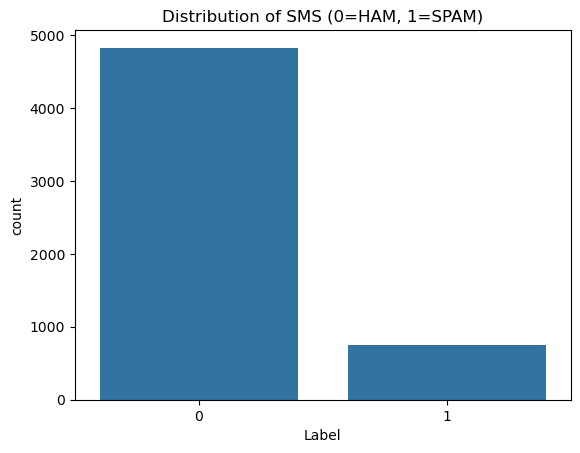

In [30]:
#Visualize spam vs ham
sns.countplot(x='Label', data=data)
plt.title("Distribution of SMS (0=HAM, 1=SPAM)")
plt.show()

b. Perform data-preparation (Train-Test Split) 

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
#Features and Labels
X = df['Message']
y = df['Label']

In [25]:
#Split into training and testing datasets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
#Convert text to numeric using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("Training data shape:", X_train_tfidf.shape)
print("Testing data shape :", X_test_tfidf.shape)

Training data shape: (4457, 3000)
Testing data shape : (1115, 3000)


c. Apply at least two Machine Learning Algorithms and Evaluate Models 

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [33]:
#Model 1: Naive Bayes 
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)

print("🔹 Naive Bayes Results 🔹")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb)*100:.2f}%")
print(classification_report(y_test, y_pred_nb))

🔹 Naive Bayes Results 🔹
Accuracy: 98.48%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



In [34]:
#Model 2: Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)

print("🔹 Logistic Regression Results 🔹")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)*100:.2f}%")
print(classification_report(y_test, y_pred_lr))

🔹 Logistic Regression Results 🔹
Accuracy: 97.85%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



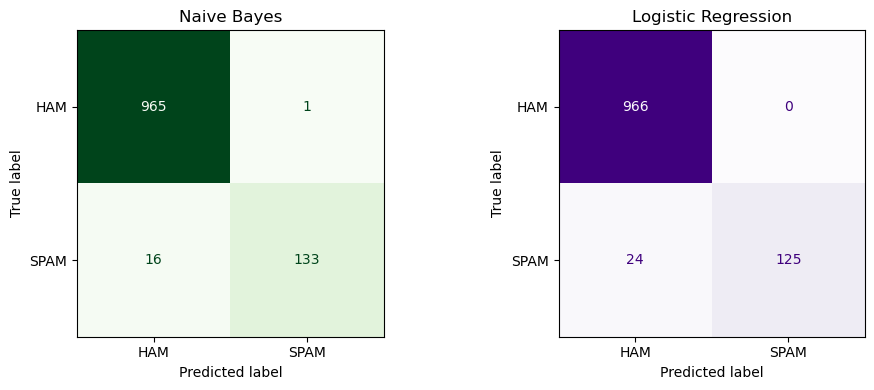

In [37]:
#Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(10,4))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_nb), display_labels=['HAM','SPAM']).plot(ax=axes[0], cmap='Greens', colorbar=False)
axes[0].set_title("Naive Bayes")

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lr), display_labels=['HAM','SPAM']).plot(ax=axes[1], cmap='Purples', colorbar=False)
axes[1].set_title("Logistic Regression")

plt.tight_layout()
plt.show()

d. Apply Cross-Validation and Evaluate Models and compare performance

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
#Perform 5-fold cross-validation
cv_nb = cross_val_score(nb_model, X_train_tfidf, y_train, cv=5)
cv_lr = cross_val_score(lr_model, X_train_tfidf, y_train, cv=5)

print("Naive Bayes Cross-Validation Accuracy:", round(np.mean(cv_nb)*100, 2), "%")
print("Logistic Regression Cross-Validation Accuracy:", round(np.mean(cv_lr)*100, 2), "%")

Naive Bayes Cross-Validation Accuracy: 97.76 %
Logistic Regression Cross-Validation Accuracy: 95.6 %


e. Apply Hyper parameter tuning and evaluate models and compare performance.

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
#Naive Bayes Tuning
param_nb = {'alpha': [0.1, 0.5, 1.0]}
grid_nb = GridSearchCV(MultinomialNB(), param_nb, cv=5)
grid_nb.fit(X_train_tfidf, y_train)

print("Best Params for Naive Bayes:", grid_nb.best_params_)
print("Best CV Score (Naive Bayes):", round(grid_nb.best_score_*100, 2), "%")

Best Params for Naive Bayes: {'alpha': 0.5}
Best CV Score (Naive Bayes): 98.47 %


In [42]:
#Logistic Regression Tuning 
param_lr = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_lr, cv=5)
grid_lr.fit(X_train_tfidf, y_train)

print("Best Params for Logistic Regression:", grid_lr.best_params_)
print("Best CV Score (Logistic Regression):", round(grid_lr.best_score_*100, 2), "%")

Best Params for Logistic Regression: {'C': 10, 'solver': 'lbfgs'}
Best CV Score (Logistic Regression): 97.73 %
